<a href="https://colab.research.google.com/github/boneeyah/DS7337/blob/main/Case%20Study%207/CaseStudy7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict

from sklearn.utils import shuffle
from numpy import random
from itertools import product

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

import xgboost as xgb
from xgboost import DMatrix

from numpy import random
from itertools import product
from sklearn.utils import shuffle

import datetime
import pydot
import graphviz


2023-08-06 17:13:09.656604: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 17:13:10.309290: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
#from google.colab import drive
#drive.mount('drive')

#df = pd.read_csv("drive/My Drive/final_project(5).csv")
df = pd.read_csv("/home/migue/Downloads/final_project(5).csv")

In [3]:
df.info()
#there are NAs will need handling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [4]:
for i in df.columns:
    if df[i].isna().sum() > 0:
        print('{} has {}% NAs'.format(i,(df[i].isna().sum() / len(df))*100))

x0 has 0.01625% NAs
x1 has 0.015625% NAs
x2 has 0.02375% NAs
x3 has 0.023125% NAs
x4 has 0.01625% NAs
x5 has 0.023125% NAs
x6 has 0.01625% NAs
x7 has 0.016875% NAs
x8 has 0.013125% NAs
x9 has 0.01875% NAs
x10 has 0.026875% NAs
x11 has 0.01875% NAs
x12 has 0.0225% NAs
x13 has 0.019375% NAs
x14 has 0.021249999999999998% NAs
x15 has 0.021875000000000002% NAs
x16 has 0.01625% NAs
x17 has 0.016875% NAs
x18 has 0.025% NAs
x19 has 0.021875000000000002% NAs
x20 has 0.02375% NAs
x21 has 0.018125% NAs
x22 has 0.016875% NAs
x23 has 0.029375000000000002% NAs
x24 has 0.017499999999999998% NAs
x25 has 0.01375% NAs
x26 has 0.0225% NAs
x27 has 0.01875% NAs
x28 has 0.021875000000000002% NAs
x29 has 0.01875% NAs
x30 has 0.01875% NAs
x31 has 0.024374999999999997% NAs
x32 has 0.019375% NAs
x33 has 0.025625000000000002% NAs
x34 has 0.025625000000000002% NAs
x35 has 0.01875% NAs
x36 has 0.016875% NAs
x37 has 0.014374999999999999% NAs
x38 has 0.019375% NAs
x39 has 0.014374999999999999% NAs
x40 has 0.0225% NA

In [5]:
df['x24'].value_counts()

asia       138965
euorpe      16538
america      4469
Name: x24, dtype: int64

<BarContainer object of 3 artists>

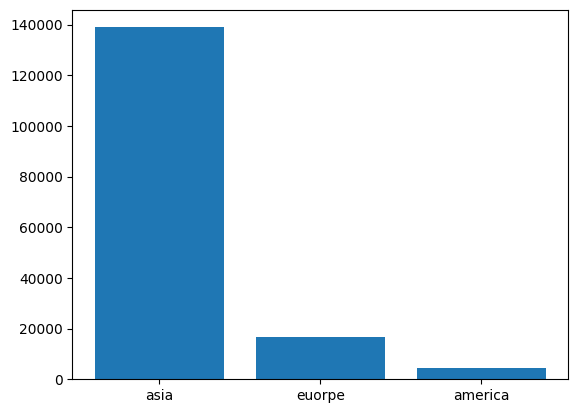

In [6]:
plt.bar(x=df['x24'].value_counts().index,height=df['x24'].value_counts().values)

In [7]:
df['x29'].value_counts()

July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
Dev           23
January        9
Name: x29, dtype: int64

In [8]:
#clean up month formatting to standard 3 letters
df['x29'].replace(to_replace=['July','sept.','Dev','January'],value=['Jul','Sep','Dec','Jan'],inplace=True)

<BarContainer object of 12 artists>

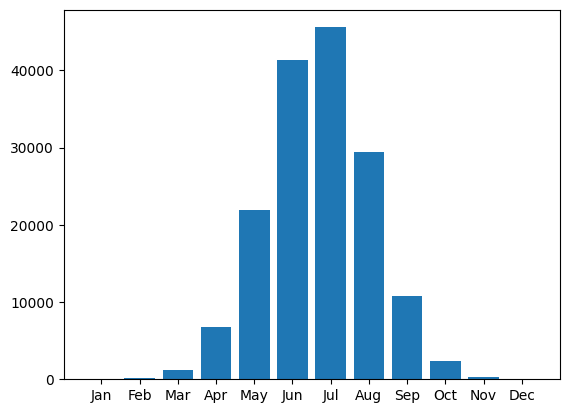

In [9]:
mo = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
heights = []
for i in mo:
    x = df['x29'].to_list().count(i)
    heights.append(x)
plt.bar(x=mo,height=heights)

Text(0.5, 0.98, 'Count plots for categorical features')

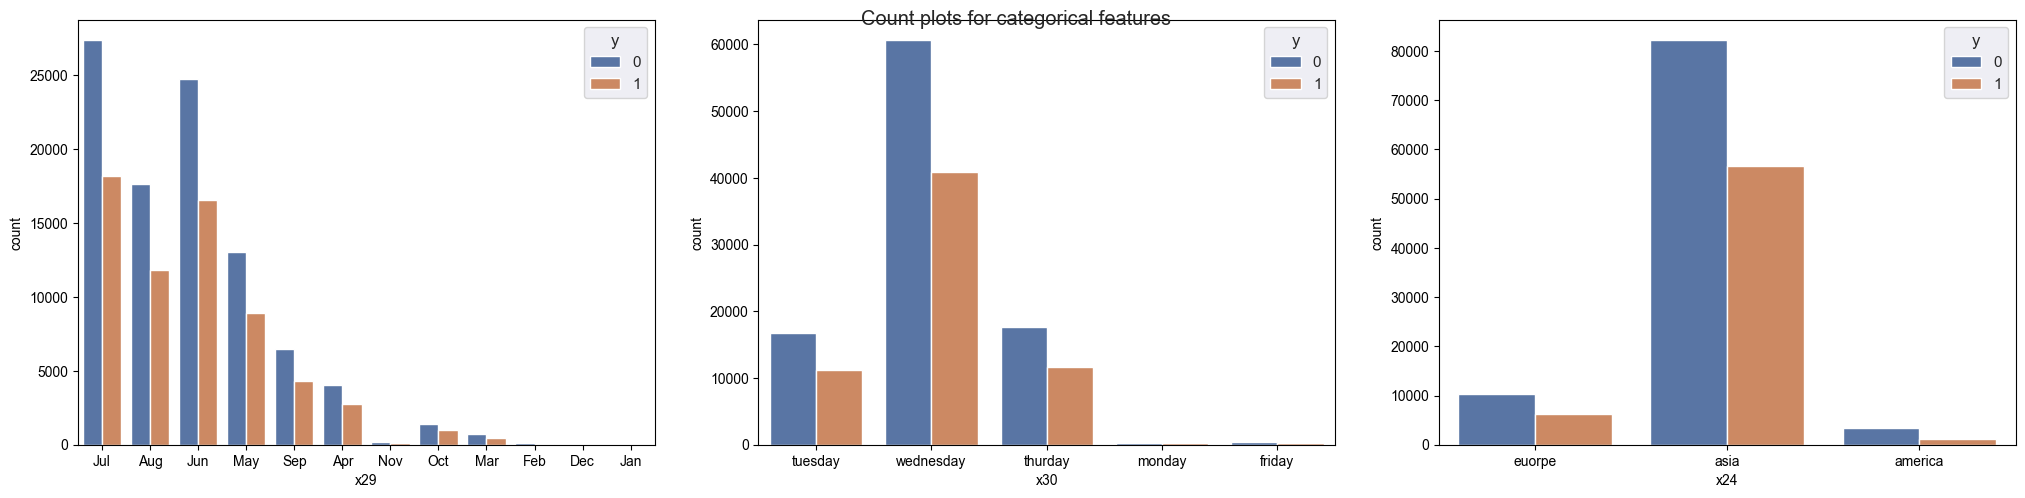

In [10]:
fig, axes = plt.subplots(1,3, figsize = (25, 5))
plt.subplots_adjust(wspace=.18,hspace=1)
fig.subplots_adjust(top = .96)
sns.set(rc={'figure.figsize':(5.5,6)})
sns.countplot(x = 'x29', data = df, hue = 'y', ax = axes[0]);
sns.countplot(x = 'x30', data = df, hue = 'y', ax = axes[1]);
sns.countplot(x = 'x24', data = df, hue = 'y', ax = axes[2]);

fig.suptitle('Count plots for categorical features')

In [11]:
df['x30'].value_counts()

wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
Name: x30, dtype: int64

<BarContainer object of 5 artists>

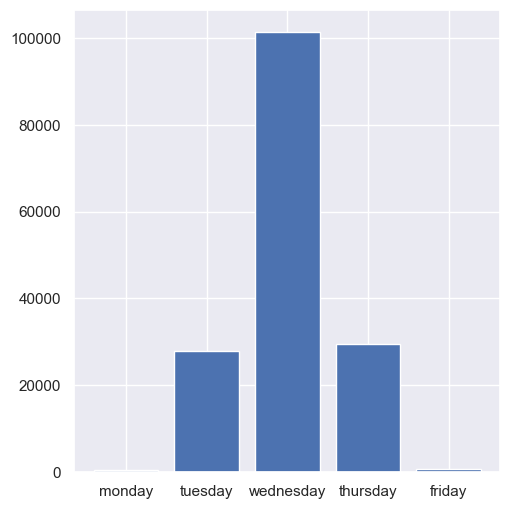

In [12]:
# thursday is incorrect
df['x30'].replace(to_replace = 'thurday',value='thursday',inplace=True)
days = ['monday','tuesday','wednesday','thursday','friday']
d_heights = []
for i in days:
    x = df['x30'].to_list().count(i)
    d_heights.append(x)
plt.bar(x=days,height = d_heights)

In [13]:
df['x32'].value_counts()

0.01%     40767
-0.01%    34094
0.0%      33923
-0.0%     30492
-0.02%     9924
0.02%      7987
-0.03%     1727
0.03%       855
-0.04%      138
0.04%        55
-0.05%        6
0.05%         1
Name: x32, dtype: int64

In [14]:
df['x37'].value_counts()


$-311.26     6
$-336.77     6
$237.4       6
$72.42       6
$341.26      6
            ..
$-505.21     1
$770.07      1
$74.62       1
$-1082.96    1
$-1229.34    1
Name: x37, Length: 129198, dtype: int64

In [15]:
### x32 and x37 are actually numeric with string format (even though x32 has few "levels" or possible values)
### x32 is in percentage, but don't think it needs to be transformed to proportion since data will be scaled later (will double check, but should make no difference)

df['x32'] = df['x32'].transform(lambda x: float(str(x).replace('%','')))
df['x37'] = df['x37'].transform(lambda x: float(str(x).replace('$','')))

In [16]:
#all significanlty less than 5%, should be no issue imputing,
#imputing categorical features with modes
# imputing continent with mode, then dates by mode grouped by continent

print('imputing continent with mode: {}'.format(df['x24'].aggregate(pd.Series.mode)))
df['x24'] = df['x24'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))

print('imputing month with mode by cont: {}'.format(df[['x24','x29']].groupby(by='x24').aggregate(pd.Series.mode)))
idx_29 = df.loc[df['x29'].isna(),:].index #saving NAs indices to quick check what they've been imputed with
df['x29'] = df[['x24','x29']].groupby(by='x24').transform(lambda grp: grp.fillna(pd.Series.mode(grp)[0]))

# will fix index showing on print later


imputing continent with mode: 0    asia
Name: x24, dtype: object
imputing month with mode by cont:          x29
x24         
america  Jul
asia     Jul
euorpe   Jul


In [17]:
df[['x24','x29','x30']].groupby(by=['x24','x29']).aggregate(pd.Series.mode)
# could just impute with wednesday since Wed is mode per month, but adding continent gives more context and different days for some months

x30
x24     x29           
america Apr  wednesday
        Aug  wednesday
        Feb    tuesday
        Jul  wednesday
        Jun  wednesday
        Mar  wednesday
        May  wednesday
        Nov  wednesday
        Oct  wednesday
        Sep  wednesday
asia    Apr  wednesday
        Aug  wednesday
        Dec  wednesday
        Feb  wednesday
        Jan  wednesday
        Jul  wednesday
        Jun  wednesday
        Mar  wednesday
        May  wednesday
        Nov  wednesday
        Oct  wednesday
        Sep  wednesday
euorpe  Apr  wednesday
        Aug  wednesday
        Dec  wednesday
        Feb    tuesday
        Jul  wednesday
        Jun  wednesday
        Mar  wednesday
        May  wednesday
        Nov  wednesday
        Oct  wednesday
        Sep  wednesday

In [18]:
# impute day
df['x30'] = df[['x24','x29','x30']].groupby(by=['x24','x29']).transform(lambda grp: grp.fillna(pd.Series.mode(grp)[0]))

In [19]:
#created categorical variable for high/low volume based on month/continent
conditions = [
    (df['x24'] == 'america'),
    (df['x24'] =='asia') & (df['x29'] == 'Jan'),
    (df['x24'] =='asia') & (df['x29'] != 'Jan'),
    (df['x24'] =='euorpe')
    ]

values = ['low', 'low', 'high', 'high']
df['Volume'] = np.select(conditions, values)
df[['Volume', 'y']].groupby(['Volume']).count()

,y
Volume,
high,155522
low,4478


In [20]:
X = df.loc[:,df.columns != 'y']
y = df['y'].values.flatten()

df_num = X.select_dtypes(exclude='object')
num_cols = df_num.columns

# impute numeric with median
for i in num_cols:
    df_num[i] = df_num[i].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))
df_num.info()

df_cat = X.select_dtypes(include='object')
cat_cols = df_cat.columns

# scale numerical data
scaler = StandardScaler()
df_num = scaler.fit_transform(df_num)

#one hot encode cat data
encoder = OneHotEncoder(sparse_output=False)
df_cat = encoder.fit_transform(df_cat)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 47 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      160000 non-null  float64
 1   x1      160000 non-null  float64
 2   x2      160000 non-null  float64
 3   x3      160000 non-null  float64
 4   x4      160000 non-null  float64
 5   x5      160000 non-null  float64
 6   x6      160000 non-null  float64
 7   x7      160000 non-null  float64
 8   x8      160000 non-null  float64
 9   x9      160000 non-null  float64
 10  x10     160000 non-null  float64
 11  x11     160000 non-null  float64
 12  x12     160000 non-null  float64
 13  x13     160000 non-null  float64
 14  x14     160000 non-null  float64
 15  x15     160000 non-null  float64
 16  x16     160000 non-null  float64
 17  x17     160000 non-null  float64
 18  x18     160000 non-null  float64
 19  x19     160000 non-null  float64
 20  x20     160000 non-null  float64
 21  x21     16

In [21]:
X = np.hstack([df_num,df_cat])

In [22]:
X.shape

(160000, 69)

In [23]:
df['y'].value_counts() # not balanced

0    95803
1    64197
Name: y, dtype: int64

In [24]:
## define cost function
def cost_func(y_pred,y_true):
    diff = y_pred - y_true
    x = 0
    for i in diff:
        #false pos (y_pred -y_true == 1)
        if i == 1:
            x += 100
        #false neg (y_pred -y_true ==-1)
        elif i == -1:
            x += 150
    return(x)

In [25]:
#stratifiedkfold by high/lower volume created category
#in order to get an equal distribution of the 0s during high volume time and 1s during low, replace with binary imediately after

y=df[['Volume', 'y']].astype(str).apply("-".join, axis=1)
skf = StratifiedKFold(n_splits=10,random_state=807,shuffle=True)
skf.get_n_splits(X,y)
y = df['y'].values.flatten()

### Logistic Regression

In [26]:
logR = LogisticRegression(random_state=807,penalty='l2',class_weight='balanced',solver='lbfgs',max_iter=1000)
params = {'C':[0.00001,0.0001,0.001,0.01,0.1,1,2,5,10]}

lr_clf = GridSearchCV(estimator=logR,param_grid=params,n_jobs=-1,cv=skf)
lr_clf.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=807, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=807),
             n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10]})

In [30]:
lr_params = lr_clf.best_params_
#lr_params ={'C': 0.001, 'l1_ratio': 0.5, 'max_iter': 50}
lr_params

{'C': 0.001}

In [28]:
model1 = LogisticRegression(random_state=807,penalty='l2',class_weight='balanced',solver='lbfgs')
model1.set_params(**lr_params)
model1.fit(X,y)

preds_m1 = cross_val_predict(model1,X,y,cv=skf)

In [29]:
cr_m1 = classification_report(y,preds_m1,output_dict=True)
cr_m1

{'0': {'precision': 0.7716230424436943,
  'recall': 0.7277433900817302,
  'f1-score': 0.7490411370985935,
  'support': 95803.0},
 '1': {'precision': 0.6254863952904013,
  'recall': 0.6785675343084567,
  'f1-score': 0.6509466385738408,
  'support': 64197.0},
 'accuracy': 0.7080125,
 'macro avg': {'precision': 0.6985547188670478,
  'recall': 0.7031554621950935,
  'f1-score': 0.6999938878362172,
  'support': 160000.0},
 'weighted avg': {'precision': 0.7129884528355696,
  'recall': 0.7080125,
  'f1-score': 0.7096825588373838,
  'support': 160000.0}}

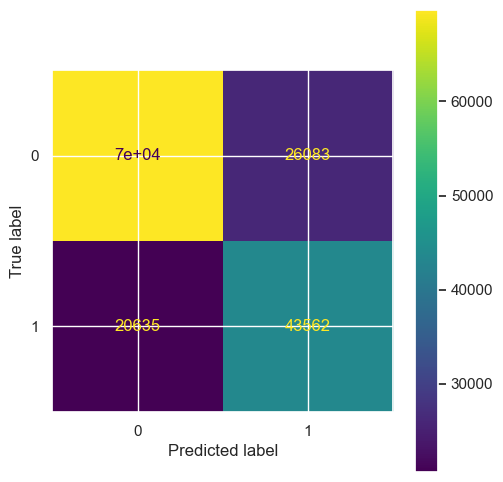

In [31]:
ConfusionMatrixDisplay.from_predictions(y,preds_m1)

In [32]:
cost_m1 = cost_func(preds_m1,y)
cost_m1

5703550

### Random Forest

In [33]:
rf = RandomForestClassifier(random_state=807,criterion='gini',class_weight='balanced')
params = {'n_estimators':[100, 200],'max_features':['sqrt','log2',20]}
rf_clf = GridSearchCV(rf,param_grid=params,cv=skf,n_jobs = -1)

In [34]:
rf_clf.fit(X,y)

/home/migue/anaconda3/envs/CS7/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=807, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=807),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2', 20],
                         'n_estimators': [100, 200]})

In [35]:
rf_clf.best_params_

{'max_features': 20, 'n_estimators': 200}

In [36]:
rf_params = {'max_features': 20, 'n_estimators': 200}
rf_params

{'max_features': 20, 'n_estimators': 200}

In [37]:
model2 = RandomForestClassifier(random_state=807,criterion='gini',class_weight='balanced')
model2.set_params(**rf_params)
preds_m2 = cross_val_predict(model2,X,y,cv=skf)

In [ ]:
preds_m2 = pd.read_csv("/content/rf_results.csv")

In [38]:
preds_m2

array([0, 0, 0, ..., 0, 0, 1])

In [39]:
preds_m2 = preds_m2['0']

IndexError: ignored

In [40]:
cr_m2 = classification_report(y,preds_m2,output_dict=True)
cr_m2

{'0': {'precision': 0.9573556175358869,
  'recall': 0.9279563270461259,
  'f1-score': 0.9424267480812449,
  'support': 95803.0},
 '1': {'precision': 0.8971983496924292,
  'recall': 0.938314874526847,
  'f1-score': 0.9172960955107511,
  'support': 64197.0},
 'accuracy': 0.9321125,
 'macro avg': {'precision': 0.9272769836141581,
  'recall': 0.9331356007864864,
  'f1-score': 0.929861421795998,
  'support': 160000.0},
 'weighted avg': {'precision': 0.9332186417624715,
  'recall': 0.9321125,
  'f1-score': 0.93234354493707,
  'support': 160000.0}}

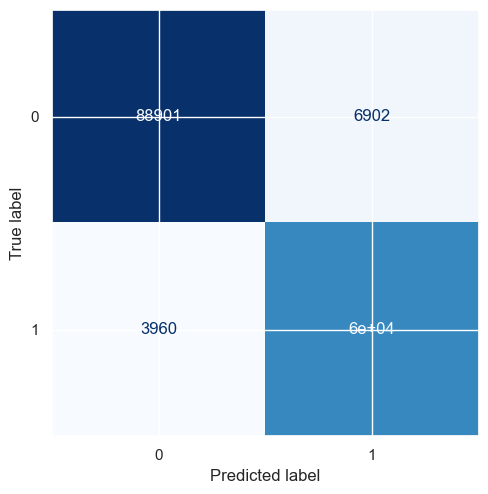

In [41]:
ConfusionMatrixDisplay.from_predictions(y,preds_m2 ,cmap='Blues', colorbar=False)

In [42]:
cost_m2 = cost_func(preds_m2,y)
cost_m2

1284200

### XGBoost

In [43]:
#setting up a hyperparameter dataframe

learning_rates = [0.1, 0.25, 0.35]
max_depths = [3, 5, 10, 20]
gamma = [0,1,3]
lambda_ls = [1,2,3]
alpha = [0,0.1,1]

xgb_param = pd.DataFrame(list(product(learning_rates, max_depths, gamma, lambda_ls, alpha)), columns=['learning_rate', 'max_depth', 'gamma', 'lambda', 'alpha'])

#randomizing the dataframe order
xgb_param = shuffle(xgb_param)
xgb_param = xgb_param.reset_index()
xgb_param=xgb_param.drop(['index'], axis=1)
xgb_param

,learning_rate,max_depth,gamma,lambda,alpha
0,0.25,10,3,1,1.0
1,0.10,5,3,1,1.0
2,0.35,5,0,2,1.0
3,0.35,20,0,3,0.1
4,0.35,20,1,1,0.1
...,...,...,...,...,...
319,0.10,20,1,3,0.1
320,0.10,5,3,2,1.0
321,0.35,3,3,1,0.1
322,0.25,3,0,1,0.0


In [45]:
trials = 30
best_params = {}
for j, (train_index, test_index) in enumerate(skf.split(X,y)):
  dtrain = xgb.DMatrix(X[train_index], label=y[train_index])
  dtest = xgb.DMatrix(X[test_index], label=y[test_index])


  i=0

  for i in range(trials):
    #random sampling from paramdf
    hyperparams = {'objective': 'binary:logistic',
                  'eta': xgb_param['learning_rate'][i],
                  'max_depth': xgb_param['max_depth'][i],
                  'gamma': xgb_param['gamma'][i],
                  'lambda': xgb_param['lambda'][i],
                  'alpha': xgb_param['alpha'][i],
                  'eval_metric': 'aucpr'
                  }

    print(hyperparams)
    out=xgb.cv(params=hyperparams,
              num_boost_round=20,
              dtrain=dtrain,
              nfold=5,
              stratified=True,
              early_stopping_rounds=3,
              verbose_eval=1
              )

    index=out.shape[0]-1
    result=out.iloc[index,2]
    if i< 1.1:
      best_result = result
      best_params = hyperparams

    if result> best_result:
        best_result = result
        best_params = hyperparams
        print('result: ' ,result)
        print('best result: ' ,best_result)
        print('hyperparameters: ' ,hyperparams)
        print('best hyperparameters: ' ,best_params)
        i+=1

Streaming output truncated to the last 5000 lines.
[4]	train-aucpr:0.75408+0.00421	test-aucpr:0.74960+0.00529
[5]	train-aucpr:0.76847+0.00477	test-aucpr:0.76378+0.00599
[6]	train-aucpr:0.77926+0.00525	test-aucpr:0.77517+0.00589
[7]	train-aucpr:0.79105+0.00461	test-aucpr:0.78679+0.00609
[8]	train-aucpr:0.80141+0.00674	test-aucpr:0.79656+0.00824
[9]	train-aucpr:0.81007+0.00540	test-aucpr:0.80512+0.00579
[10]	train-aucpr:0.81743+0.00238	test-aucpr:0.81241+0.00438
[11]	train-aucpr:0.82371+0.00256	test-aucpr:0.81899+0.00459
[12]	train-aucpr:0.83044+0.00287	test-aucpr:0.82559+0.00475
[13]	train-aucpr:0.83554+0.00328	test-aucpr:0.83043+0.00443
[14]	train-aucpr:0.84040+0.00256	test-aucpr:0.83512+0.00419
[15]	train-aucpr:0.84579+0.00272	test-aucpr:0.84073+0.00473
[16]	train-aucpr:0.84822+0.00317	test-aucpr:0.84285+0.00489
[17]	train-aucpr:0.85105+0.00386	test-aucpr:0.84550+0.00554
[18]	train-aucpr:0.85553+0.00226	test-aucpr:0.84979+0.00431
[19]	train-aucpr:0.85873+0.00230	test-aucpr:0.85293+0.0

In [46]:
best_params

{'objective': 'binary:logistic',
 'eta': 0.35,
 'max_depth': 20,
 'gamma': 1,
 'lambda': 3,
 'alpha': 0.0,
 'eval_metric': 'aucpr'}

In [47]:
aucpr_params = {'objective': 'binary:logistic',
         'eta': 0.35,
         'max_depth': 20,
         'gamma': 1,
         'lambda': 3,
         'alpha': 0,
         'eval_metric': 'aucpr'}

In [48]:
fold_results = {}

for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    dtrain = xgb.DMatrix(X[train_index], label=y[train_index])
    dtest = xgb.DMatrix(X[test_index], label=y[test_index])
    evallist = [(dtrain, 'train'), (dtest, 'eval')]

    tr=xgb.train(params=aucpr_params,
                 num_boost_round=222,
                 dtrain=dtrain,
                 verbose_eval=1,
                 evals=evallist,
                 early_stopping_rounds = 3
             )

    preds_XGB = np.round(tr.predict(dtest), 0)

    classification_report(y[test_index],np.round(preds_XGB, 0),output_dict=True)
    fold_results.update({i:{'predictions':preds_XGB,'index':test_index,'y_true':y[test_index]}})

[0]	train-aucpr:0.95451	eval-aucpr:0.89678
[1]	train-aucpr:0.98137	eval-aucpr:0.93020
[2]	train-aucpr:0.98963	eval-aucpr:0.94414
[3]	train-aucpr:0.99313	eval-aucpr:0.95214
[4]	train-aucpr:0.99546	eval-aucpr:0.95807
[5]	train-aucpr:0.99679	eval-aucpr:0.96031
[6]	train-aucpr:0.99757	eval-aucpr:0.96260
[7]	train-aucpr:0.99828	eval-aucpr:0.96501
[8]	train-aucpr:0.99869	eval-aucpr:0.96676
[9]	train-aucpr:0.99902	eval-aucpr:0.96823
[10]	train-aucpr:0.99926	eval-aucpr:0.96946
[11]	train-aucpr:0.99942	eval-aucpr:0.97015
[12]	train-aucpr:0.99955	eval-aucpr:0.97095
[13]	train-aucpr:0.99964	eval-aucpr:0.97189
[14]	train-aucpr:0.99970	eval-aucpr:0.97236
[15]	train-aucpr:0.99976	eval-aucpr:0.97304
[16]	train-aucpr:0.99977	eval-aucpr:0.97341
[17]	train-aucpr:0.99983	eval-aucpr:0.97367
[18]	train-aucpr:0.99986	eval-aucpr:0.97406
[19]	train-aucpr:0.99988	eval-aucpr:0.97439
[20]	train-aucpr:0.99992	eval-aucpr:0.97433
[21]	train-aucpr:0.99993	eval-aucpr:0.97472
[22]	train-aucpr:0.99995	eval-aucpr:0.9748

In [49]:
preds_m3 = np.zeros(len(y))
for i in fold_results.keys():
  for j in range(len(fold_results.get(i).get('predictions'))):
    idx = fold_results.get(i).get('index')[j]
    preds_m3[idx] = np.round(fold_results.get(i).get('predictions')[j], 0)

In [50]:
m3_cost = cost_func(preds_m3,y)
m3_cost

1180650

In [51]:
preds_new3 = np.zeros(len(y))
for i in fold_results.keys():
  for j in range(len(fold_results.get(i).get('predictions'))):
    idx = fold_results.get(i).get('index')[j]
    if fold_results.get(i).get('predictions')[j] > 0.6:
      preds_new3[idx] = 1
    else:
      preds_new3[idx] = 0
m3_cost_t = cost_func(y,preds_new3)
m3_cost_t

1119100

### Neural Network

In [ ]:
#sets binary values for predictions
def cost(y_true,y_pred):

  bin_p = K.switch(K.greater_equal(y_pred,0.5),K.constant(1,shape=y_pred.shape),
                   K.constant(0,shape=y_pred.shape))
  diff = bin_p-y_true

  error = K.switch(
      K.equal(diff,1),K.constant(100,shape=y_pred.shape),
      K.switch(
          K.equal(diff,-1),K.constant(150,shape=y_pred.shape),
          K.constant(0,shape=y_pred.shape)
      )
  )
  return(K.sum(error))

In [ ]:
### define a cost function used in validation with keras and backend
### returns the average cost (total cost divided by array tensor size)
def cost(y_true,y_pred):
  bin_p = tf.where(tf.greater_equal(y_pred,0.5),tf.constant(1,dtype='float32'),tf.constant(0,dtype='float32'))

  diff = bin_p - y_true

  error = tf.where(
      tf.equal(diff,1),100,
      tf.where(
          tf.equal(diff,-1),150,
          0
      )
  )
  return(K.sum(error)/tf.size(bin_p))

In [ ]:
now = datetime.datetime.now

In [ ]:
es = EarlyStopping(monitor='val_cost', mode='min',patience=50,restore_best_weights=True,start_from_epoch=100)
fold_results = {}
t_tot = now()
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
  # building model within loop to reset weights each time
  tf.keras.backend.clear_session()
  tf.keras.utils.set_random_seed(807)
  model4 = tf.keras.Sequential()
  model4.add(tf.keras.Input(shape=(X.shape[1],)))
  model4.add(tf.keras.layers.Dense(64, activation='relu',name="Relu1"))
  model4.add(tf.keras.layers.Dense(64, activation='relu', name="Relu2"))
  model4.add(tf.keras.layers.Dropout(0.4))
  model4.add(tf.keras.layers.Dense(1, activation='sigmoid', name="Activation"))
  model4.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics = [tf.keras.metrics.AUC(from_logits=False), 'accuracy',cost])
  t_fold = now()
  print('x_train shape:', X[train_index].shape)
  model4.fit(X[train_index],y[train_index],epochs=1000,batch_size=1024,validation_split=0.1,callbacks=[es])
  score = model4.evaluate(X[test_index],y[test_index])
  fold_results.update({i:{'predictions':model4.predict(X[test_index]).flatten(),'index':test_index,'y_true':y[test_index]}})
  print('fold train/predict time: %s' % (now()-t_fold))
  print('fold accuracy: {} - fold cost: {}'.format(score[2],score[3]))
print('total train/predict time: %s' % (now()-t_tot))

x_train shape: (144000, 69)
Epoch 1/1000
127/127 [==============================] - 2s 6ms/step - loss: 0.5461 - auc: 0.7797 - accuracy: 0.7152 - cost: 37.7363 - val_loss: 0.4092 - val_auc: 0.8941 - val_accuracy: 0.8208 - val_cost: 22.7181
Epoch 2/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.3658 - auc: 0.9148 - accuracy: 0.8432 - cost: 19.9780 - val_loss: 0.3208 - val_auc: 0.9346 - val_accuracy: 0.8622 - val_cost: 17.0117
Epoch 3/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.3153 - auc: 0.9372 - accuracy: 0.8704 - cost: 16.3913 - val_loss: 0.2950 - val_auc: 0.9455 - val_accuracy: 0.8770 - val_cost: 15.6771
Epoch 4/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.2870 - auc: 0.9480 - accuracy: 0.8832 - cost: 14.7903 - val_loss: 0.2706 - val_auc: 0.9540 - val_accuracy: 0.8917 - val_cost: 13.1771
Epoch 5/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.2663 - auc: 0.9553 - accuracy: 0.8932 - cost: 

In [ ]:
m4_results = fold_results

In [ ]:
preds_m4 = np.zeros(len(y))
for i in fold_results.keys():
  for j in range(len(fold_results.get(i).get('predictions'))):
    idx = fold_results.get(i).get('index')[j]
    preds_m4[idx] = np.round(fold_results.get(i).get('predictions')[j],0)
m4_cost = cost_func(y,preds_m4)
m4_cost

554900

In [ ]:
preds_new4 = np.zeros(len(y))
for i in m4_results.keys():
  for j in range(len(m4_results.get(i).get('predictions'))):
    idx = m4_results.get(i).get('index')[j]
    if m4_results.get(i).get('predictions')[j] > 0.6:
      preds_new4[idx] = 1
    else:
      preds_new4[idx] = 0
m4_cost_t = cost_func(y,preds_new4)
m4_cost_t

570050

In [ ]:
model4.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Relu1 (Dense)               (None, 64)                4480      
                                                                 
 Relu2 (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 Activation (Dense)          (None, 1)                 65        
                                                                 
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.save('model4.keras')

In [ ]:
es = EarlyStopping(monitor='val_cost', mode='min',patience=50,restore_best_weights=True,start_from_epoch=100)
fold_results = {}
t_tot = now()
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
  # building model within loop to reset weights each time
  tf.keras.backend.clear_session()
  tf.keras.utils.set_random_seed(807)
  model5 = tf.keras.Sequential()
  model5.add(tf.keras.Input(shape=(X.shape[1],)))
  model5.add(tf.keras.layers.Dense(64, activation='relu',name="Relu1"))
  model5.add(tf.keras.layers.Dense(64, activation='relu', name="Relu2"))
  model5.add(tf.keras.layers.Dropout(0.2))
  model5.add(tf.keras.layers.Dense(1, activation='sigmoid', name="Activation"))
  model5.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics = [tf.keras.metrics.AUC(from_logits=False), 'accuracy',cost])
  t_fold = now()
  print('x_train shape:', X[train_index].shape)
  model5.fit(X[train_index],y[train_index],epochs=1000,batch_size=1024,validation_split=0.1,callbacks=[es])
  score = model5.evaluate(X[test_index],y[test_index])
  fold_results.update({i:{'predictions':model5.predict(X[test_index]).flatten(),'index':test_index,'y_true':y[test_index]}})
  print('fold train/predict time: %s' % (now()-t_fold))
  print('fold accuracy: {} - fold cost: {}'.format(score[2],score[3]))
print('total train/predict time: %s' % (now()-t_tot))

x_train shape: (144000, 69)
Epoch 1/1000
127/127 [==============================] - 2s 6ms/step - loss: 0.5265 - auc: 0.8009 - accuracy: 0.7294 - cost: 35.9773 - val_loss: 0.3919 - val_auc: 0.9022 - val_accuracy: 0.8288 - val_cost: 21.9434
Epoch 2/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.3471 - auc: 0.9236 - accuracy: 0.8525 - cost: 18.7994 - val_loss: 0.3144 - val_auc: 0.9371 - val_accuracy: 0.8675 - val_cost: 16.4290
Epoch 3/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.3006 - auc: 0.9428 - accuracy: 0.8754 - cost: 15.7681 - val_loss: 0.2883 - val_auc: 0.9483 - val_accuracy: 0.8801 - val_cost: 15.3385
Epoch 4/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.2716 - auc: 0.9533 - accuracy: 0.8896 - cost: 14.0008 - val_loss: 0.2614 - val_auc: 0.9572 - val_accuracy: 0.8956 - val_cost: 12.6400
Epoch 5/1000
127/127 [==============================] - 1s 4ms/step - loss: 0.2488 - auc: 0.9609 - accuracy: 0.9010 - cost: 

In [ ]:
m5_results = fold_results

In [ ]:
preds_m5 = np.zeros(len(y))
for i in fold_results.keys():
  for j in range(len(fold_results.get(i).get('predictions'))):
    idx = fold_results.get(i).get('index')[j]
    preds_m5[idx] = np.round(fold_results.get(i).get('predictions')[j],0)

m5_cost = cost_func(y,preds_m5)
m5_cost

581950

In [ ]:
preds_new5 = np.zeros(len(y))
for i in m5_results.keys():
  for j in range(len(m5_results.get(i).get('predictions'))):
    idx = m5_results.get(i).get('index')[j]
    if m5_results.get(i).get('predictions')[j] > 0.6:
      preds_new5[idx] = 1
    else:
      preds_new5[idx] = 0

m5_cost_t = cost_func(y,preds_new5)
m5_cost_t

571900

In [ ]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Relu1 (Dense)               (None, 64)                4480      
                                                                 
 Relu2 (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 Activation (Dense)          (None, 1)                 65        
                                                                 
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5.save('model5.keras')

In [ ]:
from google.colab import files

y_alt = pd.DataFrame()

#one hot encoding categorical variables for model
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list((set(cols) - set(num_cols)))

#creating dataframe of categorical columns
cat_df = df[cat_cols]
cat_df = pd.get_dummies(cat_df, columns=cat_df.columns,sparse=True)
cat_df

y_alt['Volume_high']= cat_df['Volume_high']
y_alt['preds_m1']=preds_m1
y_alt['preds_m2']=preds_m2
y_alt['preds_m3']=preds_m3
y_alt['preds_m4']=preds_m4
y_alt['preds_m5']=preds_m5

y_alt['preds_new4']=preds_new4
y_alt['preds_new5']=preds_new5


y_alt.to_csv('results.csv', encoding = 'utf-8-sig')
files.download('results.csv')

<ipython-input-129-e030d734e541>:26: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  y_alt.to_csv('results.csv', encoding = 'utf-8-sig')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_alt

,Volume_high,preds_m1,preds_m2,preds_m3,preds_m4,preds_m5,preds_new4,preds_new5
0,1,0,0,0.0,0.0,0.0,0.0,0.0
1,1,1,0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,1.0,0.0,0.0,0.0,0.0
4,1,1,1,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
159995,1,1,1,1.0,1.0,1.0,1.0,1.0
159996,1,0,0,0.0,0.0,0.0,0.0,0.0
159997,1,1,0,0.0,0.0,0.0,0.0,0.0
159998,1,0,0,0.0,0.0,0.0,0.0,0.0


### Results

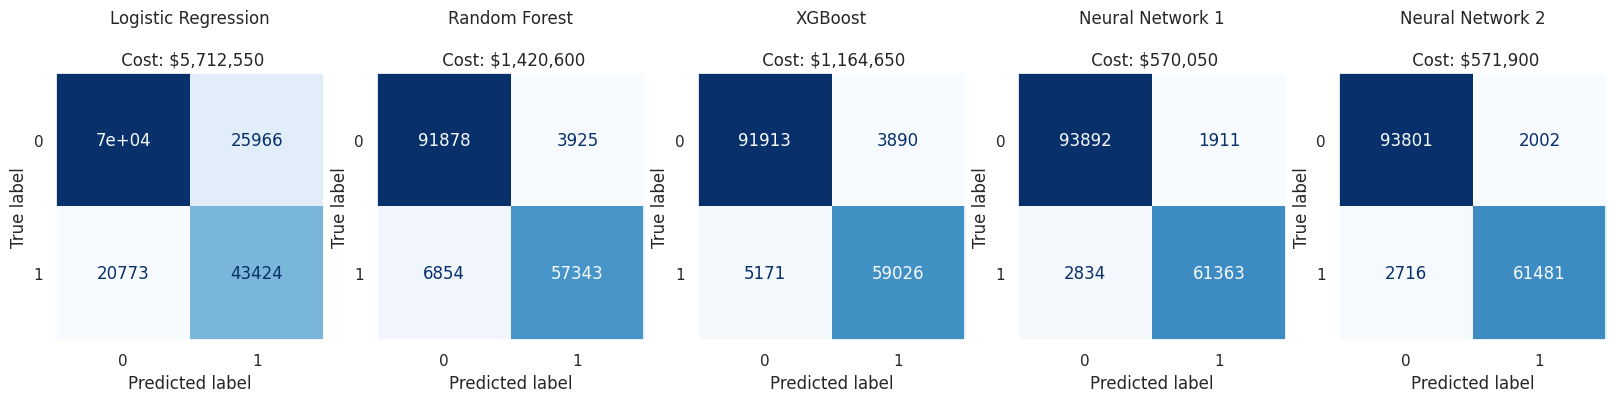

In [ ]:
#Confusion Matrix of Results

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


cm_preds_m1 = confusion_matrix(y,preds_m1)
cm_preds_m2 = confusion_matrix(y,preds_m2)
cm_preds_m3 = confusion_matrix(y,preds_m3)
cm_preds_m4 = confusion_matrix(y,preds_new4)
cm_preds_m5 = confusion_matrix(y,preds_new5)

fig, ax = plt.subplots(1,5,figsize= (20,4))

disp1 = ConfusionMatrixDisplay(cm_preds_m1).plot(ax = ax[0],cmap = 'Blues', colorbar=False)
ax[0].set_title('Logistic Regression'+ '\n\n' + ' Cost: '+ '$'+ str(f'{cost_m1:,}'), fontsize = 12)
ax[0].grid(False)

disp2 = ConfusionMatrixDisplay(cm_preds_m2).plot(ax= ax[1],cmap='Blues', colorbar=False)
ax[1].set_title('Random Forest'+ '\n\n' + ' Cost: '+ '$'+ str(f'{cost_m2:,}'), fontsize = 12)
ax[1].grid(False)


disp3 = ConfusionMatrixDisplay(cm_preds_m3).plot(ax= ax[2],cmap='Blues', colorbar=False)
ax[2].set_title('XGBoost'+ '\n\n' + ' Cost: '+ '$'+ str(f'{m3_cost:,}'), fontsize = 12)
ax[2].grid(False)

disp4 = ConfusionMatrixDisplay(cm_preds_m4).plot(ax= ax[3],cmap='Blues', colorbar=False)
ax[3].set_title('Neural Network 1'+ '\n\n' + ' Cost: '+ '$'+ str(f'{m4_cost_t:,}'), fontsize = 12)
ax[3].grid(False)

disp5 = ConfusionMatrixDisplay(cm_preds_m5).plot(ax= ax[4],cmap='Blues', colorbar=False)
ax[4].set_title('Neural Network 2'+ '\n\n' + ' Cost: '+ '$'+ str(f'{m5_cost_t:,}'), fontsize = 12)
ax[4].grid(False)



plt.show()

### Ensembling

In [ ]:
from google.colab import files

y_alt = pd.DataFrame()

#one hot encoding categorical variables for model
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list((set(cols) - set(num_cols)))

#creating dataframe of categorical columns
cat_df = df[cat_cols]
cat_df = pd.get_dummies(cat_df, columns=cat_df.columns,sparse=True)
cat_df

y_alt['Volume_high']= cat_df['Volume_high']
y_alt['preds_m1']=preds_m1
y_alt['preds_m2']=preds_m2
y_alt['preds_m3']=preds_m3
y_alt['preds_m4']=preds_m4
y_alt['preds_m5']=preds_m5

y_alt['preds_new4']=preds_new4
y_alt['preds_new5']=preds_new5


y_alt.to_csv('results.csv', encoding = 'utf-8-sig')
files.download('results.csv')

<ipython-input-191-10daa75af518>:26: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  y_alt.to_csv('results.csv', encoding = 'utf-8-sig')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y = df['y'].values.flatten()
skf = StratifiedKFold(n_splits=10,random_state=807,shuffle=True)
skf.get_n_splits(y_alt,y)


10

In [ ]:
#Ensembling
logR_ens = LogisticRegression(random_state=807,penalty='elasticnet',class_weight='balanced',solver='saga')
params = {'C':[0.00001,0.0001,0.001,0.01,0.1,1,2,5,10],'l1_ratio':[0,0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99,1],'max_iter':[25,50,75]}

lr_clf_ens = GridSearchCV(estimator=logR_ens,param_grid=params,n_jobs=-1,cv=skf)
lr_clf_ens.fit(y_alt,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=807, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          penalty='elasticnet',
                                          random_state=807, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10],
                         'l1_ratio': [0, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 0.9,
                                      0.99, 1],
                         'max_iter': [25, 50, 75]})

In [ ]:
lr_params_ens = lr_clf_ens.best_params_

In [ ]:
model1ens = LogisticRegression(random_state=807,penalty='elasticnet',class_weight='balanced',solver='saga')
model1ens.set_params(**lr_params_ens)
model1ens.fit(y_alt,y)
skf.get_n_splits(y_alt,y)
preds_ens2 = cross_val_predict(model1ens, y_alt,y,cv=skf)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [ ]:
#Ensembling
cost_ens_log = cost_func(np.round(preds_ens2, 0), y)
cm_preds_ens_log = confusion_matrix(y,np.round(preds_ens2, 0))

In [ ]:
#Combination of Neural Networks
preds_nn = (preds_new4+ preds_new5)/2
cost_nn= cost_func(np.round(preds_nn, 0), y)
cm_preds_nn = confusion_matrix(y,np.round(preds_nn, 0))

#Combination of Neural Networks and XGBoost
preds_ens = (preds_new4+ preds_new5+preds_new3 )/3
cost_ens = cost_func(np.round(preds_ens, 0), y)
cm_preds_ens = confusion_matrix(y,np.round(preds_ens, 0))




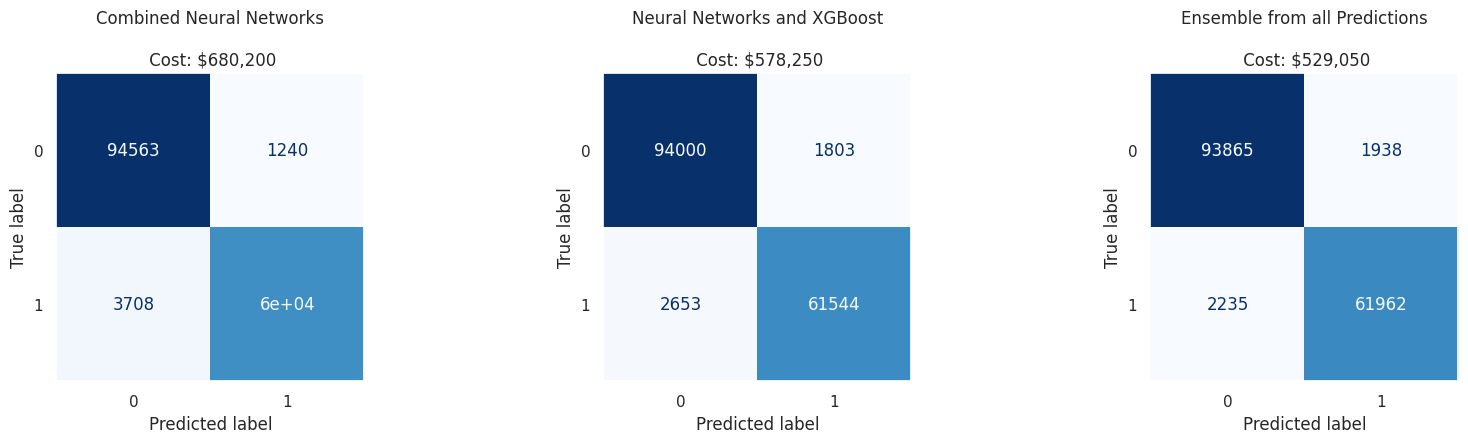

In [ ]:
fig, ax = plt.subplots(1,3,figsize= (20,4))

disp1 = ConfusionMatrixDisplay(cm_preds_nn).plot(ax = ax[0],cmap = 'Blues', colorbar=False)
ax[0].set_title('Combined Neural Networks'+ '\n\n' + ' Cost: '+ '$'+ str(f'{cost_nn:,}'), fontsize = 12)
ax[0].grid(False)

disp2 = ConfusionMatrixDisplay(cm_preds_ens).plot(ax = ax[1],cmap = 'Blues', colorbar=False)
ax[1].set_title('Neural Networks and XGBoost'+ '\n\n' + ' Cost: '+ '$'+ str(f'{cost_ens:,}'), fontsize = 12)
ax[1].grid(False)

disp3 = ConfusionMatrixDisplay(cm_preds_ens_log).plot(ax = ax[2],cmap = 'Blues', colorbar=False)
ax[2].set_title('Ensemble from all Predictions'+ '\n\n' + ' Cost: '+ '$'+ str(f'{cost_ens_log:,}'), fontsize = 12)
ax[2].grid(False)




In [ ]:
y_alt['preds_nn']=preds_nn
y_alt['preds_ens']=preds_ens
y_alt['preds_ens2']=preds_ens2


y_alt.to_csv('results.csv', encoding = 'utf-8-sig')
files.download('results.csv')

<ipython-input-174-f5d109dfe8d8>:6: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  y_alt.to_csv('results.csv', encoding = 'utf-8-sig')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>